- In optimization, a loss function is often referred to as the objective function of the optimization problem. 

- By tradition and convention most optimization algorithms are concerned with minimization. 

- If we ever need to maximize an objective there is a simple solution: just flip the sign on the objective.

In [ ]:
!pip install tensorflow tensorflow-probability

In [ ]:
!pip install d2l==0.17.5

### Goal of Optimization

- The goal of optimization is to reduce the training error

- The goal of deep learning (or more broadly, statistical inference) is to reduce the generalization error


In [ ]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from mpl_toolkits import mplot3d
from d2l import tensorflow as d2l

To illustrate the aforementioned different goals, let us consider the empirical risk and the risk.

- The empirical risk is an average loss on the training dataset

- The risk is the expected loss on the entire population of data


Below we define two functions: the risk function f and the empirical risk function g. Suppose that we have only a finite amount of training data. As a result, here g is less smooth than f.

In [ ]:
def f(x):
    return x * tf.cos(np.pi * x)

def g(x):
    return f(x) + 0.2 * tf.cos(5 * np.pi * x)

The minimum of the empirical risk on a training dataset may be at a different location from the minimum of the risk.

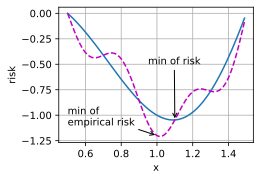

In [ ]:
def annotate(text, xy, xytext):
    d2l.plt.gca().annotate(text, xy=xy, xytext=xytext,
                           arrowprops=dict(arrowstyle='->'))

x = tf.range(0.5, 1.5, 0.01)
d2l.set_figsize((4.5, 2.5))
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
annotate('min of\nempirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('min of risk', (1.1, -1.05), (0.95, -0.5))

### Optimization Challenges in Deep Learning

We are going to focus specifically on the performance of optimization algorithms in minimizing the objective function, rather than a model’s generalization error.

#### Local Minima


For any objective function $f(x)$, if the value of $f(x)$ at $x$ is smaller than the values of $f(x)$ at any other points in the vicinity of $x$, then $f(x)$ could be a local minimum. If the value of $f(x)$ at $x$ is the minimum of the objective function over the entire domain, then $f(x)$ is the global minimum.

For example, given the function

$f(x) = x \cdot \text{cos}(\pi x) \text{ for } -1.0 \leq x \leq 2.0$

we can approximate the local minimum and global minimum of this function.

The objective function of deep learning models usually has many local optima.

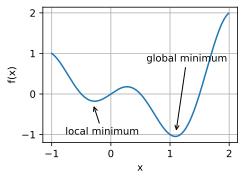

In [ ]:
x = tf.range(-1.0, 2.0, 0.01)
d2l.plot(x, [f(x), ], 'x', 'f(x)')
annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0))
annotate('global minimum', (1.1, -0.95), (0.6, 0.8))

#### Saddle Points

A saddle point is any location where all gradients of a function vanish but which is neither a global nor a local minimum.

Consider the function $f(x) = x^3$. Its first and second derivative vanish for $x=0$. Optimization might stall at this point, even though it is not a minimum.

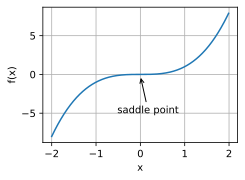

In [ ]:
x = tf.range(-2.0, 2.0, 0.01)
d2l.plot(x, [x**3], 'x', 'f(x)')
annotate('saddle point', (0, -0.2), (-0.52, -5.0))

### Vanishing Gradients

Assume that we want to minimize the function $f(x) = \tanh(x)$ and we happen to get started at $x = 4$. As we can see, the gradient of $f$ is close to nil.

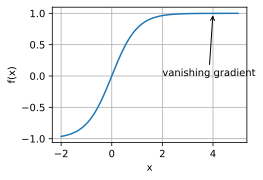

In [ ]:
x = tf.range(-2.0, 5.0, 0.01)
d2l.plot(x, [tf.tanh(x)], 'x', 'f(x)')
annotate('vanishing gradient', (4, 1), (2, 0.0))